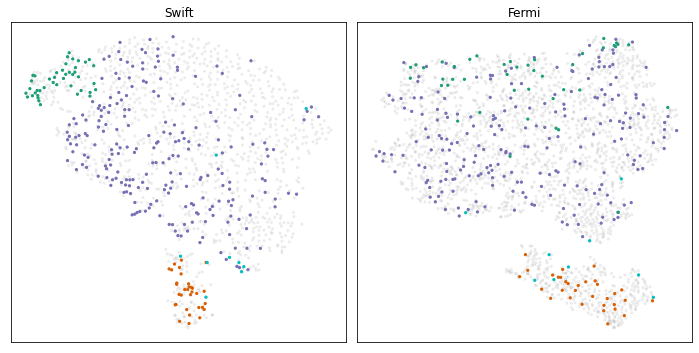

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from ipynb.fs.full.config_TSNE import conf
# This is to prevent a trivial warning pop-up
import warnings
warnings.filterwarnings('ignore')

emb1 = pd.read_csv("embedding_TSNE_20.csv", header = None).set_index(0)
emb2 = pd.read_csv("embedding_TSNE_Fermi_20.csv", header = None).set_index(0)
intersection = pd.read_csv('DataFrames/intersection_Swift_Fermi.csv')
mismatch = pd.read_csv('DataFrames/mismatching_classifications.csv')
group3 = pd.read_csv('DataFrames/third_group_Swift.txt')
group3 = group3[group3.reset_index().isin(intersection.Swift.tolist()).GRBname].set_index('GRBname').index.tolist()
group3 = intersection.set_index('Swift').loc[group3,'Fermi'].reset_index()

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
fig = plt.figure(constrained_layout=True, figsize=[9.6,4.8])
#fig.suptitle('Overlapping Bursts', size=16)
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[:, 1])
ax1.set(yticks=(), xticks=(), title='Swift')
ax2.set(yticks=(), xticks=(), title='Fermi')


groups = {'C1':-1, 'C2':0, 'C0':1, 'c':2, 'k':-2}#, 'c':-2}
emb1[3] = DBSCAN(eps=4).fit_predict(emb1.loc[:,[1,2]])
emb1[3] = emb1[3].map({0:list(groups)[1],1:list(groups)[0]})
emb2[3] = DBSCAN(eps=5).fit_predict(emb2.loc[:,[1,2]])
emb2[3] = emb2[3].map({0:list(groups)[1],1:list(groups)[0]})

for (emb,ax) in [(emb1,ax1), (emb2,ax2)]:
    unique = ~pd.Series(emb.reset_index().isin(intersection.loc[:,ax.title.get_text()].tolist()).set_index(0).index).astype(bool)
    emb.loc[unique.tolist(), 3] = list(groups)[4]
    emb.loc[group3.loc[:,ax.title.get_text()].tolist(), 3] = list(groups)[2]
    emb.loc[emb.reset_index().isin(mismatch.loc[:,ax.title.get_text()].tolist()).set_index(0).index, 3] = list(groups)[3]
    for i in groups:
        group = emb.groupby(emb[3]).get_group(i)
        ax.scatter(group[1], group[2], s=conf['radius'], c=group[3], cmap=conf['cmap'], zorder=groups[i], alpha=1-0.95*int(i==list(groups)[4]))

#emb1_plot = ax1.scatter(emb1[1], emb1[2], s=conf['radius'], c=emb1[3], cmap=conf['cmap'])
#emb2_plot = ax2.scatter(emb2[1], emb2[2], s=conf['radius'], c=emb2[3], cmap=conf['cmap'])


fig.savefig("overlapping_bursts.jpg", dpi=300)
fig.show()